## Initial Test

In [1]:
import sys
sys.path.append("../")
import os

current_directory = os.getcwd()
print(current_directory)
from egta.symmetric_game import *
from egta.game import *
from egta.utils.eq_computation import *
from egta.utils.log_multimodal import *
from egta.utils.random_functions import *
from egta.utils.simplex_operations import *
from egta.process_data import *
import matplotlib.pyplot as plt
from egta.reductions.dpr import DPRGAME
import random
import itertools

def generate_rps_25_player_data():
    """Generate symmetric Rock Paper Scissors data for 25 players"""
    
    strategies = ["ROCK", "PAPER", "SCISSORS"]
    num_players = 25
    
    # RPS payoff matrix (row beats column)
    # ROCK, PAPER, SCISSORS
    payoff_matrix = [
        [0, -1, 1],  # ROCK
        [1, 0, -1],  # PAPER
        [-1, 1, 0]   # SCISSORS
    ]
    
    # Generate a sample of possible strategy distributions
    # We'll create diverse representative profiles instead of all combinations
    profiles = []
    
    # Add uniform profiles (all same strategy)
    for strat_idx, strat in enumerate(strategies):
        profile = []
        for i in range(num_players):
            player_payoff = 0  # All players have same strategy = all ties
            profile.append([f'agent_{i+1}', strat, player_payoff])
        profiles.append(profile)
    
    distributions = [
    # Original distributions
    (15, 5, 5),    # Heavy ROCK
    (5, 15, 5),    # Heavy PAPER
    (5, 5, 15),    # Heavy SCISSORS
    (10, 10, 5),   # Equal ROCK/PAPER
    (10, 5, 10),   # Equal ROCK/SCISSORS
    (5, 10, 10),   # Equal PAPER/SCISSORS
    (8, 8, 9),     # Near equilibrium 
    (9, 8, 8),     # Near equilibrium
    (8, 9, 8),     # Near equilibrium
    (2, 2, 21),    # Very heavy SCISSORS
    
    # Extreme distributions (one dominant strategy)
    (20, 3, 2),    # Dominant ROCK
    (3, 20, 2),    # Dominant PAPER
    (2, 3, 20),    # Dominant SCISSORS
    (23, 1, 1),    # Almost all ROCK
    (1, 23, 1),    # Almost all PAPER
    (1, 1, 23),    # Almost all SCISSORS
    (25, 0, 0),    # All ROCK
    (0, 25, 0),    # All PAPER
    (0, 0, 25),    # All SCISSORS
    
    # Balanced two-strategy distributions
    (13, 12, 0),   # Only ROCK & PAPER
    (13, 0, 12),   # Only ROCK & SCISSORS
    (0, 13, 12),   # Only PAPER & SCISSORS
    
    # Various mixed distributions
    (9, 8, 8),     # Slight ROCK preference
    (8, 9, 8),     # Slight PAPER preference
    (8, 8, 9),     # Slight SCISSORS preference
    (12, 7, 6),    # Moderate ROCK preference
    (6, 12, 7),    # Moderate PAPER preference
    (7, 6, 12),    # Moderate SCISSORS preference
    
    # Near-equilibrium distributions
    (8, 8, 9),     # Close to uniform
    (9, 8, 8),     # Close to uniform
    (8, 9, 8),     # Close to uniform
    (9, 7, 9),     # Equal R-S, less P
    (7, 9, 9),     # Equal P-S, less R
    (9, 9, 7),     # Equal R-P, less S
    
    # More unusual distributions
    (15, 9, 1),    # Heavy R, some P, minimal S
    (1, 15, 9),    # Heavy P, some S, minimal R
    (9, 1, 15),    # Heavy S, some R, minimal P
    (17, 4, 4),    # Very heavy ROCK
    (4, 17, 4),    # Very heavy PAPER
    (4, 4, 17),    # Very heavy SCISSORS
    (21, 2, 2),    # Extremely heavy ROCK
    (2, 21, 2),    # Extremely heavy PAPER
    (2, 2, 21),    # Extremely heavy SCISSORS
    
    # Prime number distributions
    (11, 7, 7),    # Prime R
    (7, 11, 7),    # Prime P
    (7, 7, 11),    # Prime S
    (13, 5, 7),    # All primes
    (17, 3, 5),    # All primes
    (19, 3, 3),    # Prime R
    
    # Fibonacci-inspired
    (13, 8, 4),    # Fibonacci sequence
    (8, 5, 12),    # Reversed Fibonacci-like
    
    # Other interesting patterns
    (10, 10, 5),   # Equal R-P, half S
    (10, 5, 10),   # Equal R-S, half P
    (5, 10, 10),   # Equal P-S, half R
    (5, 5, 15),    # Equal R-P, triple S
    (5, 15, 5),    # Equal R-S, triple P
    (15, 5, 5),    # Equal P-S, triple R
    (7, 7, 11),    # Equal R-P, more S
    (7, 11, 7),    # Equal R-S, more P
    (11, 7, 7)     # Equal P-S, more R
    ]   
    
    for dist in distributions:
        strat_counts = list(dist)
        profile = []
        
        # Assign strategies to players
        player_strats = []
        for s_idx, count in enumerate(strat_counts):
            player_strats.extend([s_idx] * count)
        
        # Calculate payoffs for each player
        for p_idx in range(num_players):
            strat_idx = player_strats[p_idx]
            strat = strategies[strat_idx]
            
            # Calculate payoff based on other players
            payoff = 0
            for other_idx in range(num_players):
                if other_idx != p_idx:
                    other_strat_idx = player_strats[other_idx]
                    payoff += payoff_matrix[strat_idx][other_strat_idx]
            
            profile.append([f'agent_{p_idx+1}', strat, payoff])
        
        profiles.append(profile)
    
    # Add some random profiles
    for _ in range(10):
        strat_counts = [0, 0, 0]
        for _ in range(num_players):
            strat_counts[random.randint(0, 2)] += 1
        
        profile = []
        player_strats = []
        for s_idx, count in enumerate(strat_counts):
            player_strats.extend([s_idx] * count)
        random.shuffle(player_strats)
        
        for p_idx in range(num_players):
            strat_idx = player_strats[p_idx]
            strat = strategies[strat_idx]
            
            # Calculate payoff based on other players
            payoff = 0
            for other_idx in range(num_players):
                if other_idx != p_idx:
                    other_strat_idx = player_strats[other_idx]
                    payoff += payoff_matrix[strat_idx][other_strat_idx]
            
            profile.append([f'agent_{p_idx+1}', strat, payoff])
        
        profiles.append(profile)
    
    return profiles

# Generate and display the data
rps_25_player_data = generate_rps_25_player_data()

rps_data = rps_25_player_data

/Users/gabesmithline/Desktop/SRG/melo_project/marketsim/egta


Matplotlib created a temporary cache directory at /var/folders/fh/fwc37qhn04d8sxp65hwv1kxm0000gn/T/matplotlib-uq9qeksy because the default path (/Users/gabesmithline/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Found 17 repeat profiles in data
Profile (0, 25, 0): Strategy ROCK has 50 payoffs with mean 0.0000
Profile (25, 0, 0): Strategy PAPER has 50 payoffs with mean 0.0000
Profile (0, 0, 25): Strategy SCISSORS has 50 payoffs with mean 0.0000
Profile (5, 15, 5): Strategy PAPER has 10 payoffs with mean 10.0000
Profile (5, 15, 5): Strategy ROCK has 30 payoffs with mean 0.0000
Profile (5, 15, 5): Strategy SCISSORS has 10 payoffs with mean -10.0000
Profile (15, 5, 5): Strategy PAPER has 30 payoffs with mean 0.0000
Profile (15, 5, 5): Strategy ROCK has 10 payoffs with mean -10.0000
Profile (15, 5, 5): Strategy SCISSORS has 10 payoffs with mean 10.0000
Profile (5, 5, 15): Strategy PAPER has 10 payoffs with mean -10.0000
Profile (5, 5, 15): Strategy ROCK has 10 payoffs with mean 10.0000
Profile (5, 5, 15): Strategy SCISSORS has 30 payoffs with mean 0.0000
Profile (10, 10, 5): Strategy PAPER has 20 payoffs with mean 5.0000
Profile (10, 10, 5): Strategy ROCK has 20 payoffs with mean -5.0000
Profile (1

/Users/gabesmithline/Desktop/SRG/melo_project/marketsim/egta/../egta/symmetric_game.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.config_table = torch.tensor(config_table, dtype=torch.float32, device=device)
/Users/gabesmithline/Desktop/SRG/melo_project/marketsim/egta/../egta/symmetric_game.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.payoff_table = torch.tensor(payoff_table, dtype=torch.float32, device=device)


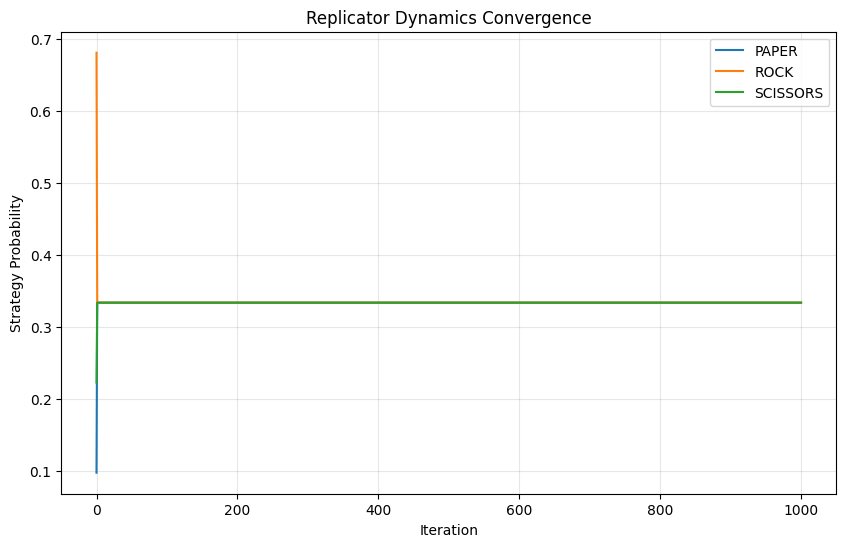

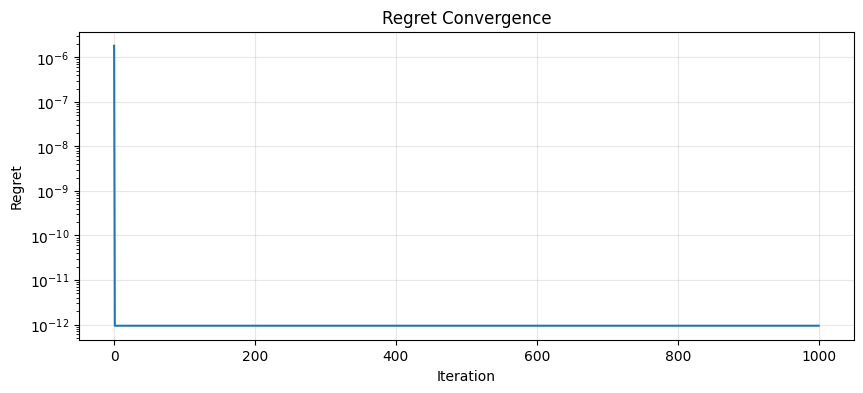

In [2]:
# Create symmetric game from the data
device = "cuda" if torch.cuda.is_available() else "cpu"
rps_game = create_symmetric_game_from_data(rps_data, device=device)
print(rps_game.num_players)
print(rps_game.num_actions)
print(rps_game.strategy_names)
print(rps_game.config_table)
print(rps_game.payoff_table)
print(rps_game.print_full_heuristic_payoff_table())
print(f"Created RPS game with {rps_game.num_players} players and {rps_game.num_actions} strategies")
print(f"Strategy names: {rps_game.strategy_names}")

#find Nash equilibrium using replicator dynamics
iters = 1000

#generate random mixture
random_mixture = torch.rand(rps_game.num_actions, device=rps_game.device)
random_mixture = simplex_normalize(random_mixture)
print(f"Starting random mixture: {random_mixture}")

#run fictitious play
#NOTE: very sensitive to step size, and the initial mixture
#FP works, gradient descent works, rd works
#Not better response does not work?

'''
NOTE:, very sensitive to step size, and the initial mixture, and other hyperparameters
'''
eq_mixture, eq_history = logged_replicator_dynamics(rps_game, random_mixture, iters=iters, offset=.7)
print(eq_history)
print("\nNash Equilibrium:")
for i, strat in enumerate(rps_game.strategy_names):
    print(f"{strat}: {eq_mixture[i].item():.4f}")

# Verify this matches the expected [1/3, 1/3, 1/3] distribution
print(f"\nMaximum deviation from uniform: {torch.max(torch.abs(eq_mixture - 1/3)).item():.6f}")

# Calculate regret at the equilibrium
regret = rps_game.regret(eq_mixture)
print(f"Regret at equilibrium: {regret.item():.6f}")

# Plot convergence history
plt.figure(figsize=(10, 6))
for i, strat in enumerate(rps_game.strategy_names):
    plt.plot(eq_history[i, :].cpu().numpy(), label=strat)
plt.xlabel("Iteration")
plt.ylabel("Strategy Probability")
plt.legend()
plt.title("Replicator Dynamics Convergence")
plt.grid(True, alpha=0.3)
plt.show()

# Plot regret over iterations
regrets = torch.zeros(iters+1, device=device)
for i in range(iters+1):
    regrets[i] = rps_game.regret(eq_history[:, i])

plt.figure(figsize=(10, 4))
plt.plot(regrets.cpu().numpy())
plt.xlabel("Iteration")
plt.ylabel("Regret")
plt.title("Regret Convergence")
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()

## Construct DPR Game From Symmetric Game

In [4]:
dpr_rps_game = DPRGAME(rps_game, 5)

#solve dpr_game 
#game, mix, iters=1000, offset=0
eq_mixture, eq_history = logged_replicator_dynamics(dpr_rps_game, random_mixture, iters=iters, offset=.7)
print(dpr_rps_game.payoff_table)
print(f"Nash: {eq_mixture}")

Found profile: 1
Found profile: 21
Found profile: 19
Found profile: 22
Found profile: 23
Found profile: 24
Found profile: 0
Found profile: 20
Found profile: 2
tensor([[-0.6931, -0.8269, -0.9263, -0.7039, -0.8198, -1.4816, -0.6710, -0.4520,
         -0.9725, -1.4310, -0.6286, -0.7073, -0.9494, -1.4386, -3.2111,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000, -3.2687,  0.0000, -1.4032, -1.4648,  0.0000, -1.4816, -0.9856,
         -0.9948,  0.0000, -0.9137, -0.8229, -0.4520, -0.7807,  0.0000, -0.6931,
         -0.8330, -0.2578, -0.7321, -0.6712,  0.0000],
        [ 0.0000,  0.0000, -0.6981,  0.0000, -0.8091, -0.7553,  0.0000, -1.0213,
         -0.4520, -0.7471,  0.0000, -1.4896, -1.0184, -0.8635, -0.8522,  0.0000,
         -3.1503, -1.4370, -1.1329, -0.9582, -0.6931]])
Nash: tensor([0.3333, 0.3333, 0.3333])
